In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns 
sns.set(style='white',color_codes =True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [75]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [76]:
df_train = pd.read_csv("J:/Datasets/titanic/train.csv")
df_train.head()
df_train.shape

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(891, 12)

In [77]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [78]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [79]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [80]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [81]:
df_train.shape

(891, 12)

In [82]:
df_train = df_train.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [83]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [84]:
df_train.groupby(['Pclass']).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [85]:
df_train['Age'] = df_train[['Age','Pclass']].apply(age_approx, axis=1)

In [86]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [87]:
df_train.dropna(inplace=True)
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [88]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [89]:
df_train_dummied = pd.get_dummies(df_train, columns = ['Sex'])

In [90]:
df_train_dummied = pd.get_dummies(df_train_dummied, columns = ["Embarked"])

In [91]:
df_train_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


<Figure size 720x720 with 0 Axes>

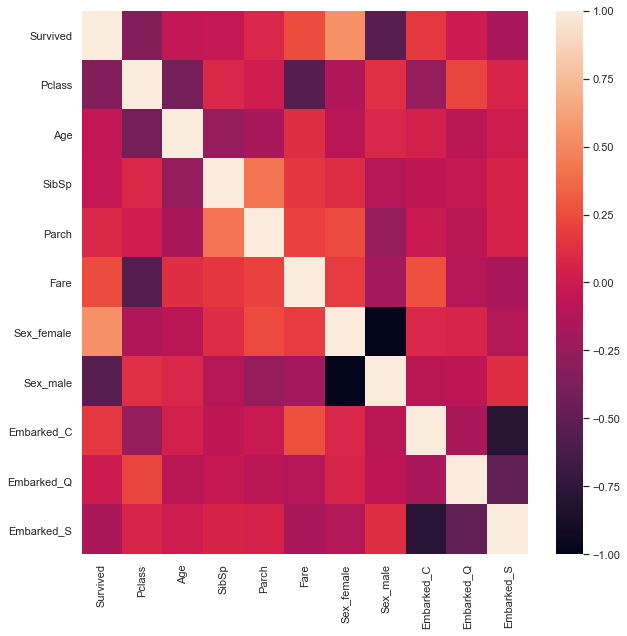

In [92]:
plt.figure(figsize = (10,10))
sns.heatmap(df_train_dummied.corr())

In [93]:
used_features = ['Pclass','Age','SibSp','Parch','Sex_female','Sex_male','Embarked_C','Embarked_Q',
                'Embarked_S']

X = df_train_dummied[used_features].values
y = df_train_dummied['Survived']

In [111]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)

In [114]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 9)
(267, 9)
(622,)
(267,)


In [117]:
LogReg = LogisticRegression()

In [122]:
LogReg.fit(X_train,y_train)

C:\Users\Abhijeet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [123]:
y_pred = LogReg.predict(X_test)

In [127]:
metrics.confusion_matrix(y_test,y_pred)

array([[141,  25],
       [ 22,  79]], dtype=int64)

In [128]:
metrics.accuracy_score(y_test, y_pred)

0.8239700374531835

In [129]:
len(X_test)

267

In [131]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       166
           1       0.76      0.78      0.77       101

    accuracy                           0.82       267
   macro avg       0.81      0.82      0.81       267
weighted avg       0.83      0.82      0.82       267



In [132]:
LogReg.coef_

array([[-0.93158886, -0.03365718, -0.22105523, -0.03237924,  2.04053497,
        -0.31206889,  0.95081772,  0.48415987,  0.29348849]])

In [133]:
LogReg.intercept_

array([1.72846608])

In [134]:
df_train_dummied[used_features].columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [135]:
LogReg.predict_proba(X_test)

array([[0.27137585, 0.72862415],
       [0.3812907 , 0.6187093 ],
       [0.93705176, 0.06294824],
       [0.28498246, 0.71501754],
       [0.93855022, 0.06144978],
       [0.15035186, 0.84964814],
       [0.34031435, 0.65968565],
       [0.51286852, 0.48713148],
       [0.77784609, 0.22215391],
       [0.40308285, 0.59691715],
       [0.73869389, 0.26130611],
       [0.21638753, 0.78361247],
       [0.75571899, 0.24428101],
       [0.16935669, 0.83064331],
       [0.86120552, 0.13879448],
       [0.37115502, 0.62884498],
       [0.87641965, 0.12358035],
       [0.29879878, 0.70120122],
       [0.18517097, 0.81482903],
       [0.43237451, 0.56762549],
       [0.89677656, 0.10322344],
       [0.58698184, 0.41301816],
       [0.85667563, 0.14332437],
       [0.93246241, 0.06753759],
       [0.52812138, 0.47187862],
       [0.49439843, 0.50560157],
       [0.04831659, 0.95168341],
       [0.86517989, 0.13482011],
       [0.89222845, 0.10777155],
       [0.34284939, 0.65715061],
       [0.